# Solver Performance Comparisons

This notebook demonstrates our testing and comparing the performance of different general purpose solvers.

### Imports and Setup

In [7]:
# Third party libraries
import matplotlib.pyplot as plt
import matplotlib_inline

import numpy as np
import pandas as pd
import seaborn as sns 

# Local imports
import flexibleSubsetSelection as fss

# Initialize notebook settings
sns.set_theme() # set seaborn theme
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # vector plots
%matplotlib inline 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
directory = "Fig4-performance" # data directory for this notebook
subsetSize = 10                # size of subset selected
verbose = False                # verbosity of solvers
seed = 123                     # random generation seed for replicability
numTrials = 1

dataset = fss.Dataset(randTypes="multimodal", size=(1000, 10), seed=seed)
dataset.save(f"{directory}/dataset")

In [174]:
with open(f"{directory}/computationDataTest.csv", 'w') as f:
    f.write(f"Header: metric=coverage\tdataset={dataset.name}\t")
    f.write(f"algorithm=greedyImprove\tn={dataset.n}\tm={dataset.m}\t")
    f.write(f"s={dataset.s}\tk={dataset.k}\n\n")
    f.write(f"time,loss,algorithm,trial,final,k\n")

    for i in range(numTrials):
        print(f"{i/numTrials:.2%}")

        z, time, loss = algorithms.greedySwap(dataset, seed=rng)
        f.write(f"{time},{loss},greedy,{i},True,None\n")

        z, time, loss = algorithms.optimization(["range", "mean"], dataset, dataset.s, env)
        f.write(f"{time},{loss},optimizationInteger,{i},True,None\n")

        for j in [2300, dataset.s*dataset.n]:
            z, time, loss = algorithms.bestOfRandom(dataset, k=j, seed=rng)
            f.write(f"{time},{loss},bestOf{j}Random,{i},True,None\n")

In [57]:
def list_to_string(objective):
    if isinstance(objective, str):
        # Remove brackets and quotes, then split by comma
        objective = objective.strip("[]").replace("'", "").replace(" ", "").split(",")
    if isinstance(objective, list):
        return "_".join(sorted(objective))
    return objective

['range' 'mean_range' 'coverage' 'coverage_distribution_mean_range'
 'coverage_mean_range']


/var/folders/rs/t3f52g4s2014fhrfb0b0fw8h0000gs/T/ipykernel_49778/2170507228.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Computation Time",
/var/folders/rs/t3f52g4s2014fhrfb0b0fw8h0000gs/T/ipykernel_49778/2170507228.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend().set_visible(False)
/var/folders/rs/t3f52g4s2014fhrfb0b0fw8h0000gs/T/ipykernel_49778/2170507228.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Computation Time",
/var/folders/rs/t3f52g4s2014fhrfb0b0fw8h0000gs/T/ipykernel_49778/2170507228.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend().set_visible(False)


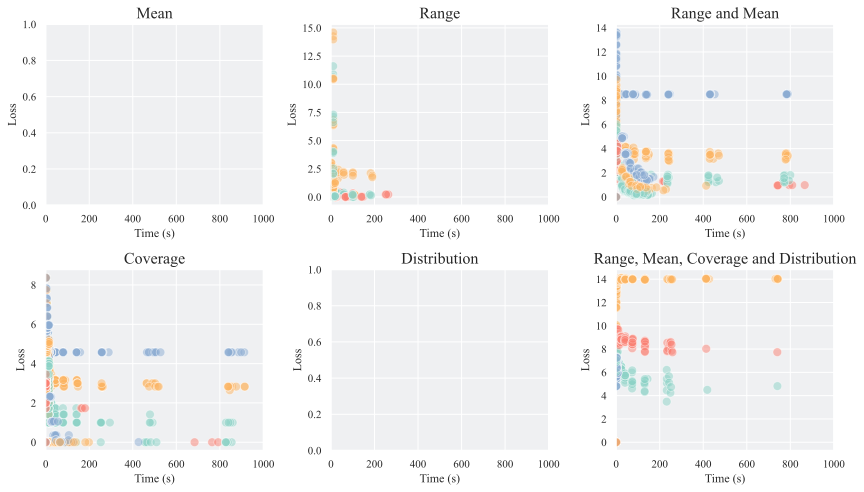

In [59]:
palette = {"green": "#8dd3c7", "orange": "#fb8072", "yellow": "#fdb462", 
           "blue": "#8dadd3", "grey": "#eff0f2"}
color = fss.plot.Color(palette)
fss.plot.initialize(color)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
axs = axs.ravel()
metrics = ["mean", "range", "mean_range", "coverage", "distribution",
           "coverage_distribution_mean_range"]
titles = ["Mean", "Range", "Range and Mean", "Coverage", "Distribution",
          "Range, Mean, Coverage and Distribution"]
df = pd.read_csv(f"../data/{directory}/computationData.csv")
df['Objective'] = df['Objective'].apply(list_to_string)
print(df["Objective"].unique())

for i, metric in enumerate(metrics):
    data = df[df["Objective"] == metric]
    sns.scatterplot(x="Computation Time",
                    y="Loss",
                    alpha=0.5,
                    hue="Algorithm",
                    palette=color.palette.values(),
                    data=data,
                    ax=axs[i],
                    s=75)

    axs[i].set_title(titles[i], fontsize=16)
    axs[i].set_ylabel("Loss")
    axs[i].set_xlabel("Time (s)")
    axs[i].set_xlim([0, 1000])
    axs[i].legend().set_visible(False)